In [1]:
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import torch

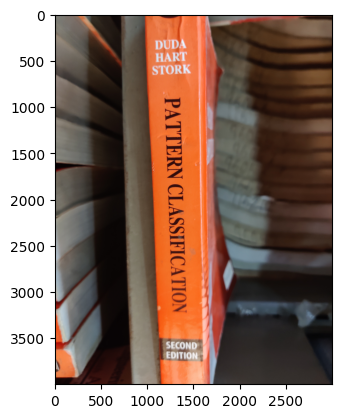

In [2]:
img = cv.cvtColor(cv.imread("../Data/Single Book Images/IMG_20230822_134826.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(cv.rotate(img, cv.ROTATE_90_CLOCKWISE))

In [ ]:
class OCR_Model(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.cnn_block = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.SELU(),
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.SELU(),
            torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            torch.nn.MaxPool2d(kernel_size=(1,2), stride=2),
            torch.nn.SELU(),
            torch.nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.SELU(),
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=512),
            torch.nn.SELU(),
            torch.nn.MaxPool2d(kernel_size=(1,2), stride=2),
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=2, stride=1, padding=0),
        )

        for layer in self.cnn_block:
            if isinstance(layer, torch.nn.Conv2d):
                torch.nn.init.xavier_uniform_(layer.weight, gain=torch.nn.init.calculate_gain('leaky_relu'))

        self.rnn_block = torch.nn.Sequential(
            torch.nn.LSTM(input_size=64, hidden_size=256, batch_first=True, bidirectional=True),
            torch.nn.LSTM(input_size=512, hidden_size=256, batch_first=True, bidirectional=True),
            torch.nn.Linear(in_features=512, out_features=10)
        )

In [13]:
from torchvision.models.segmentation import deeplabv3_mobilenet_v3_large, DeepLabV3_MobileNet_V3_Large_Weights
from torchvision.io.image import read_image
from torchvision.transforms.functional import to_pil_image

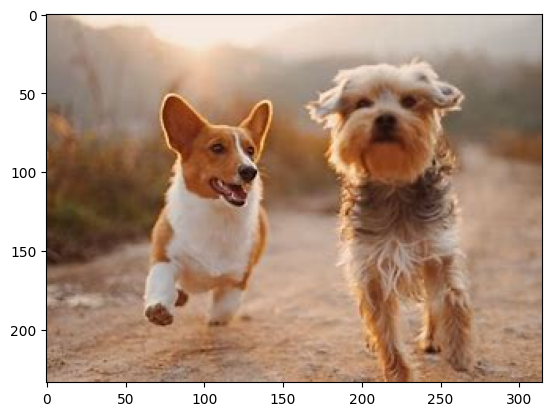

In [25]:
img = cv.cvtColor(cv.imread("../OIP.jpeg"), cv.COLOR_BGR2RGB)

plt.imshow(img)

In [26]:
img.shape

(234, 315, 3)

In [27]:
from PIL import Image
pil_img = Image.fromarray(img)

In [28]:
weights = DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT
model = deeplabv3_mobilenet_v3_large(weights=weights)

model.eval()
preprocess = weights.transforms()

batch = preprocess(pil_img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]
normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]
to_pil_image(mask).show()

In [23]:
a = DeepLabV3_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1

print(a.meta["categories"])

['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


In [29]:
from torchvision.models.segmentation import deeplabv3_resnet101, DeepLabV3_ResNet101_Weights

weights = DeepLabV3_ResNet101_Weights.DEFAULT
model = deeplabv3_resnet101(weights=weights)

model.eval()
preprocess = weights.transforms()

batch = preprocess(pil_img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]
normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]
to_pil_image(mask).show()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to C:\Users\Prash/.cache\torch\hub\checkpoints\deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:24<00:00, 10.1MB/s] 


In [30]:
weights.meta["categories"]

['__background__',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']